In [ ]:
!pip install transformers torch bitsandbytes accelerate datasets pytesseract

In [ ]:
!sudo apt-get install tesseract-ocr

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
tesseract-ocr is already the newest version (4.1.1-2.1build1).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.


In [ ]:
import pytesseract

# Set the path to the Tesseract executable
pytesseract.pytesseract.tesseract_cmd = r'/usr/bin/tesseract'

In [ ]:
from transformers import pipeline

doc_qa_model = pipeline(
    "document-question-answering",
    model="impira/layoutlm-document-qa",
)

#### Load in Images

In [ ]:
from transformers.image_utils import load_image

income_statement_path = "/content/apple_income_statement.PNG"
balance_sheet_path = "/content/apple_balance_sheet.PNG"
cash_flow_path = "/content/apple_statement_of_cash_flows.PNG"

income_statement_img = load_image(income_statement_path)
balance_sheet_img = load_image(balance_sheet_path)
cash_flow_img = load_image(cash_flow_path)

#### Query Income Statement

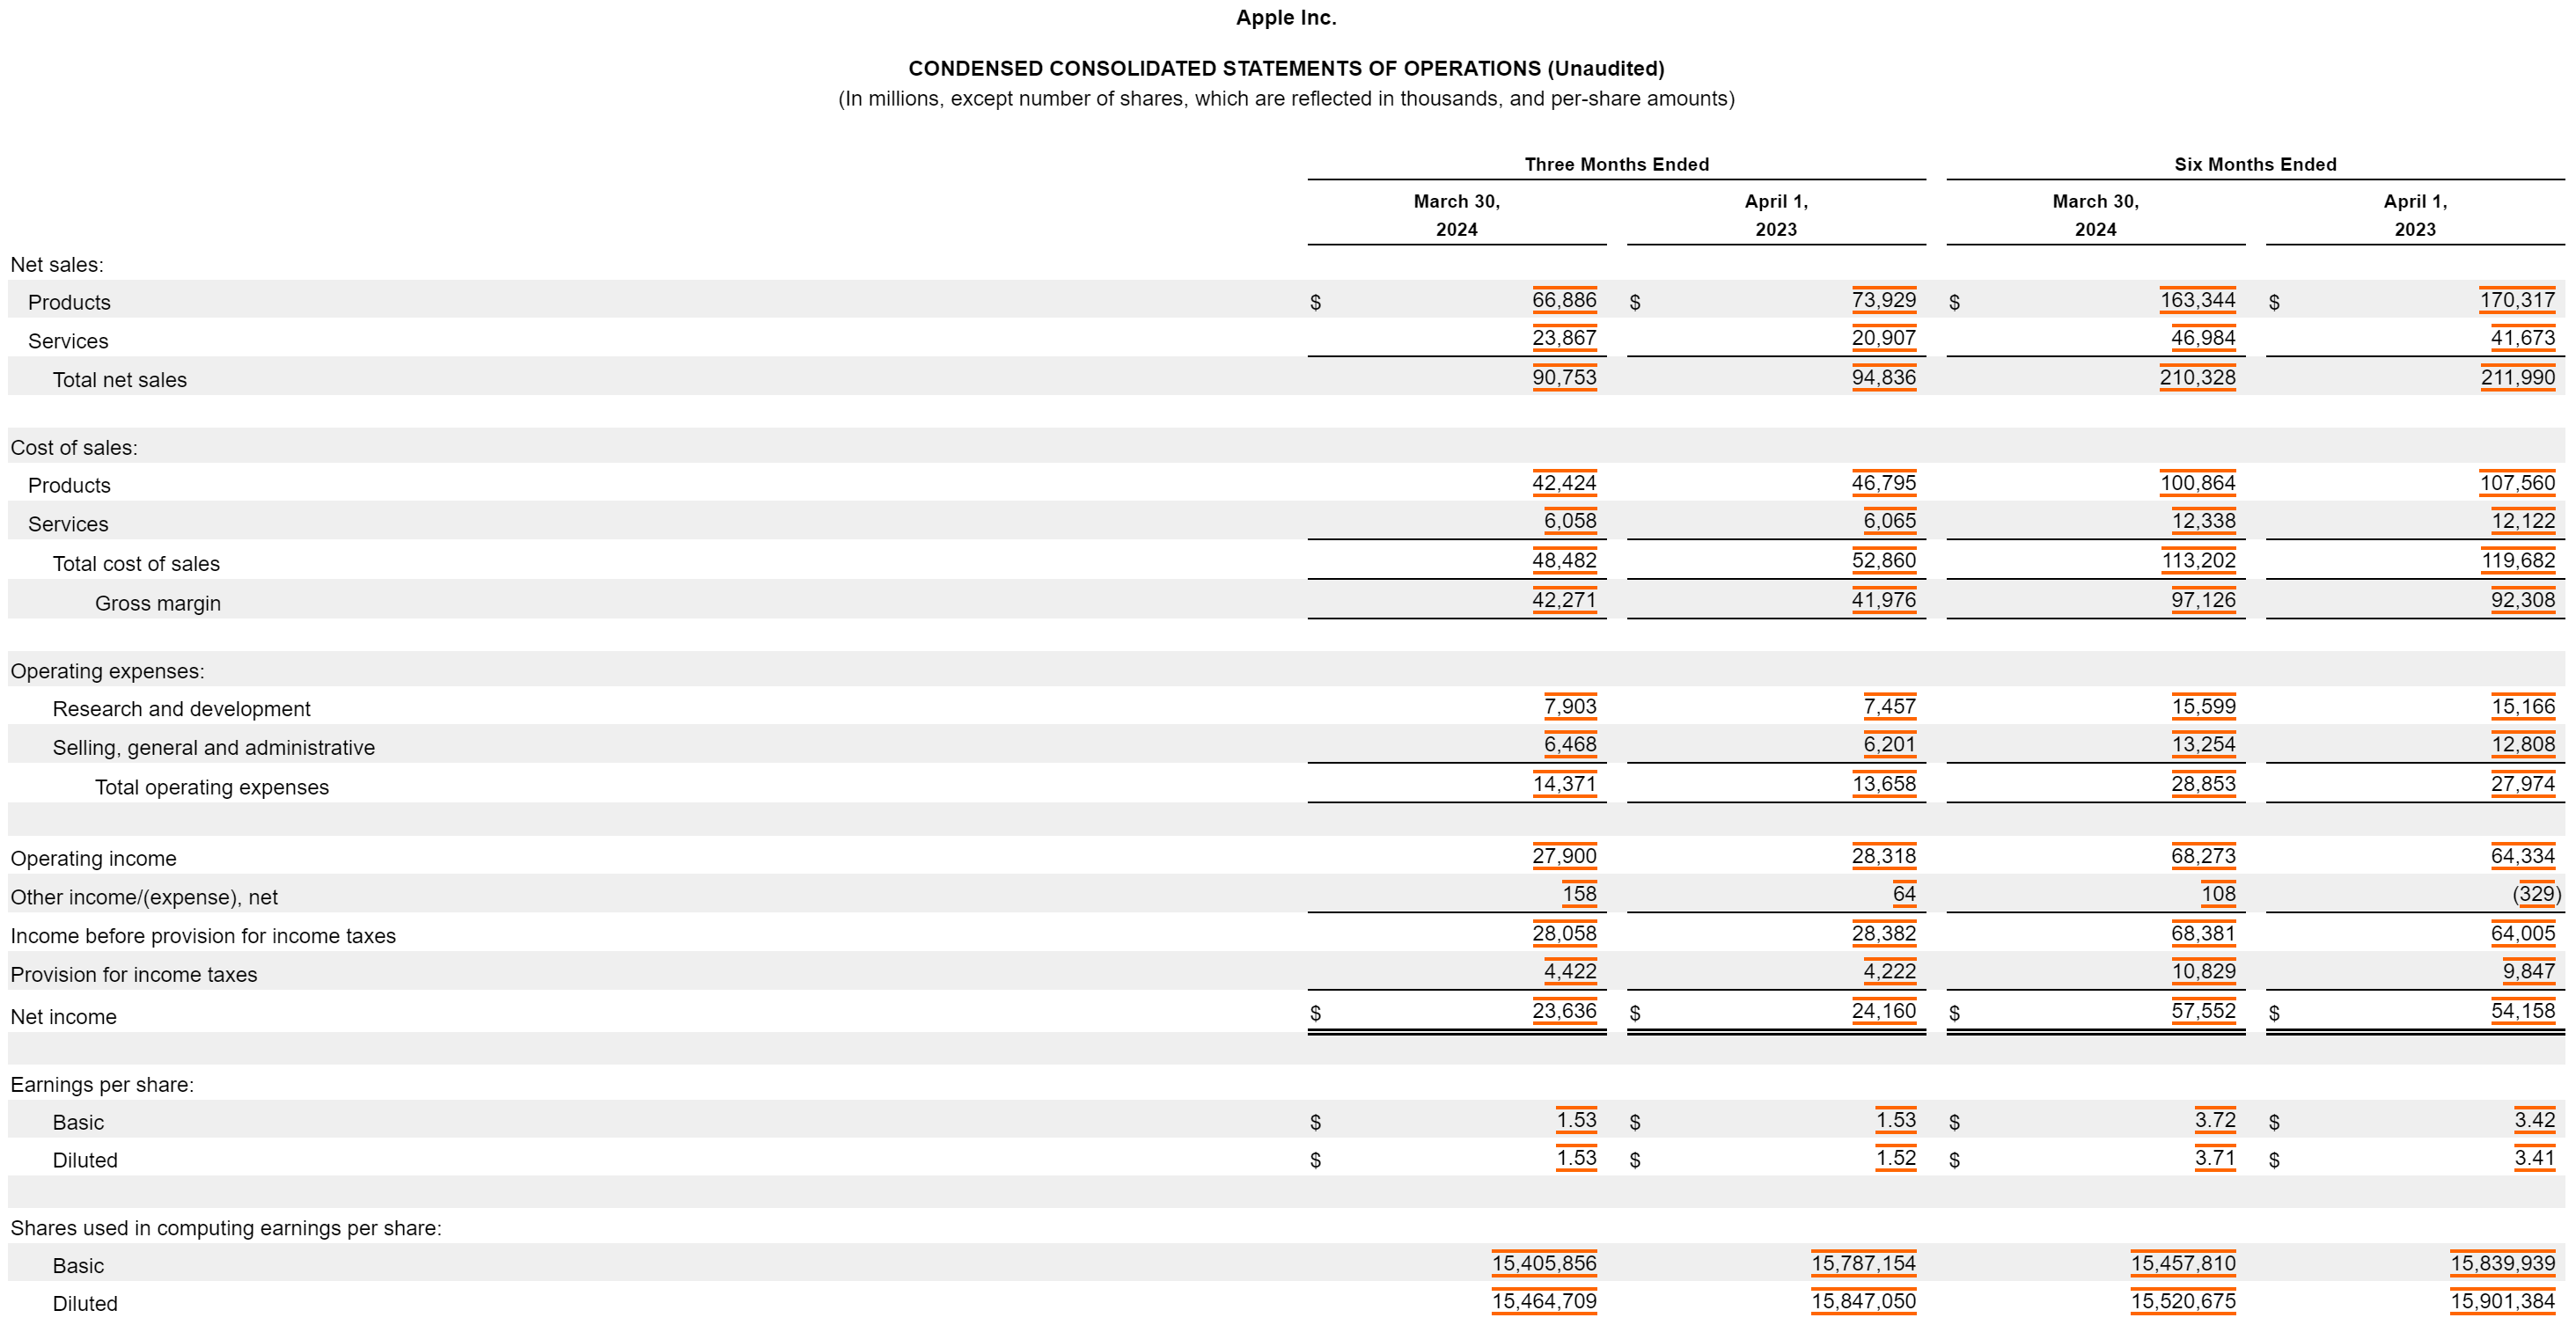

In [ ]:
income_statement_img

In [ ]:
output = doc_qa_model(
    income_statement_path,
    "What was the net sales from Products in the three months ending on March 30, 2024"
)

answer = output[0]["answer"]
print(answer)

66,886


#### Query Balance Sheet

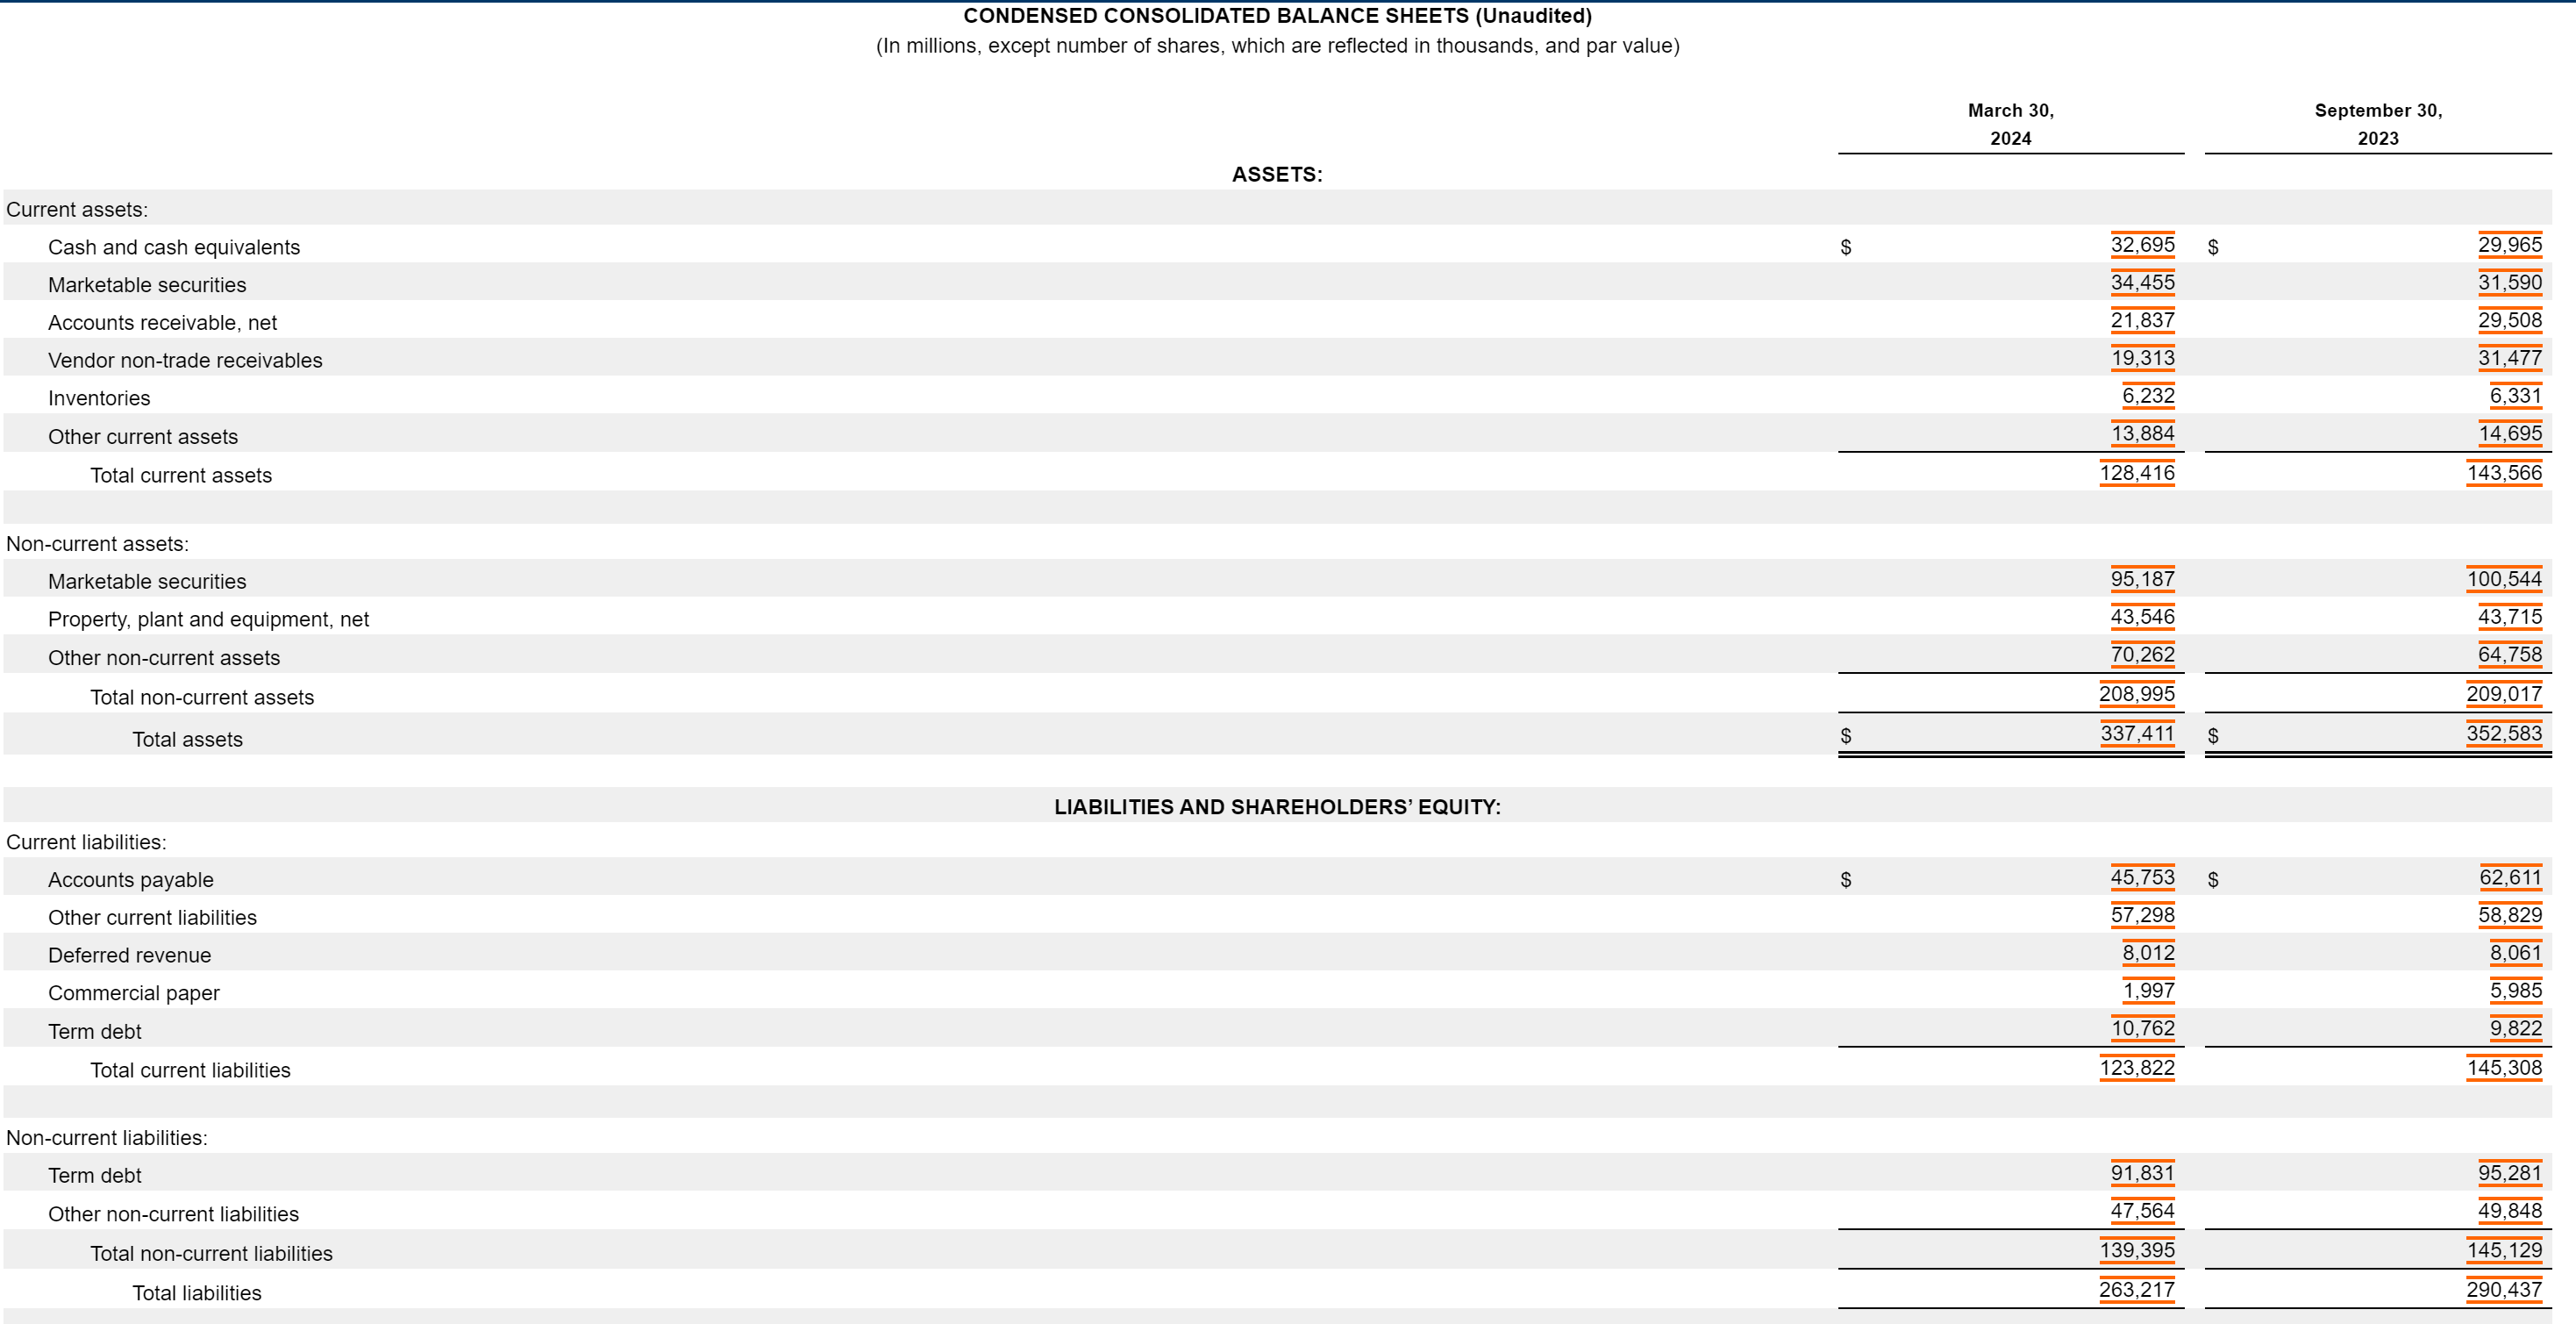

In [ ]:
balance_sheet_img

In [ ]:
output = doc_qa_model(
    balance_sheet_path,
    "What was Accounts Payable under Current liabilities in the three months ending on September 30, 2023"
)

answer = output[0]["answer"] # get's it wrong but close. It may need to be fine-tuned
print(answer)

45,753


#### Query Cash Flow Statement

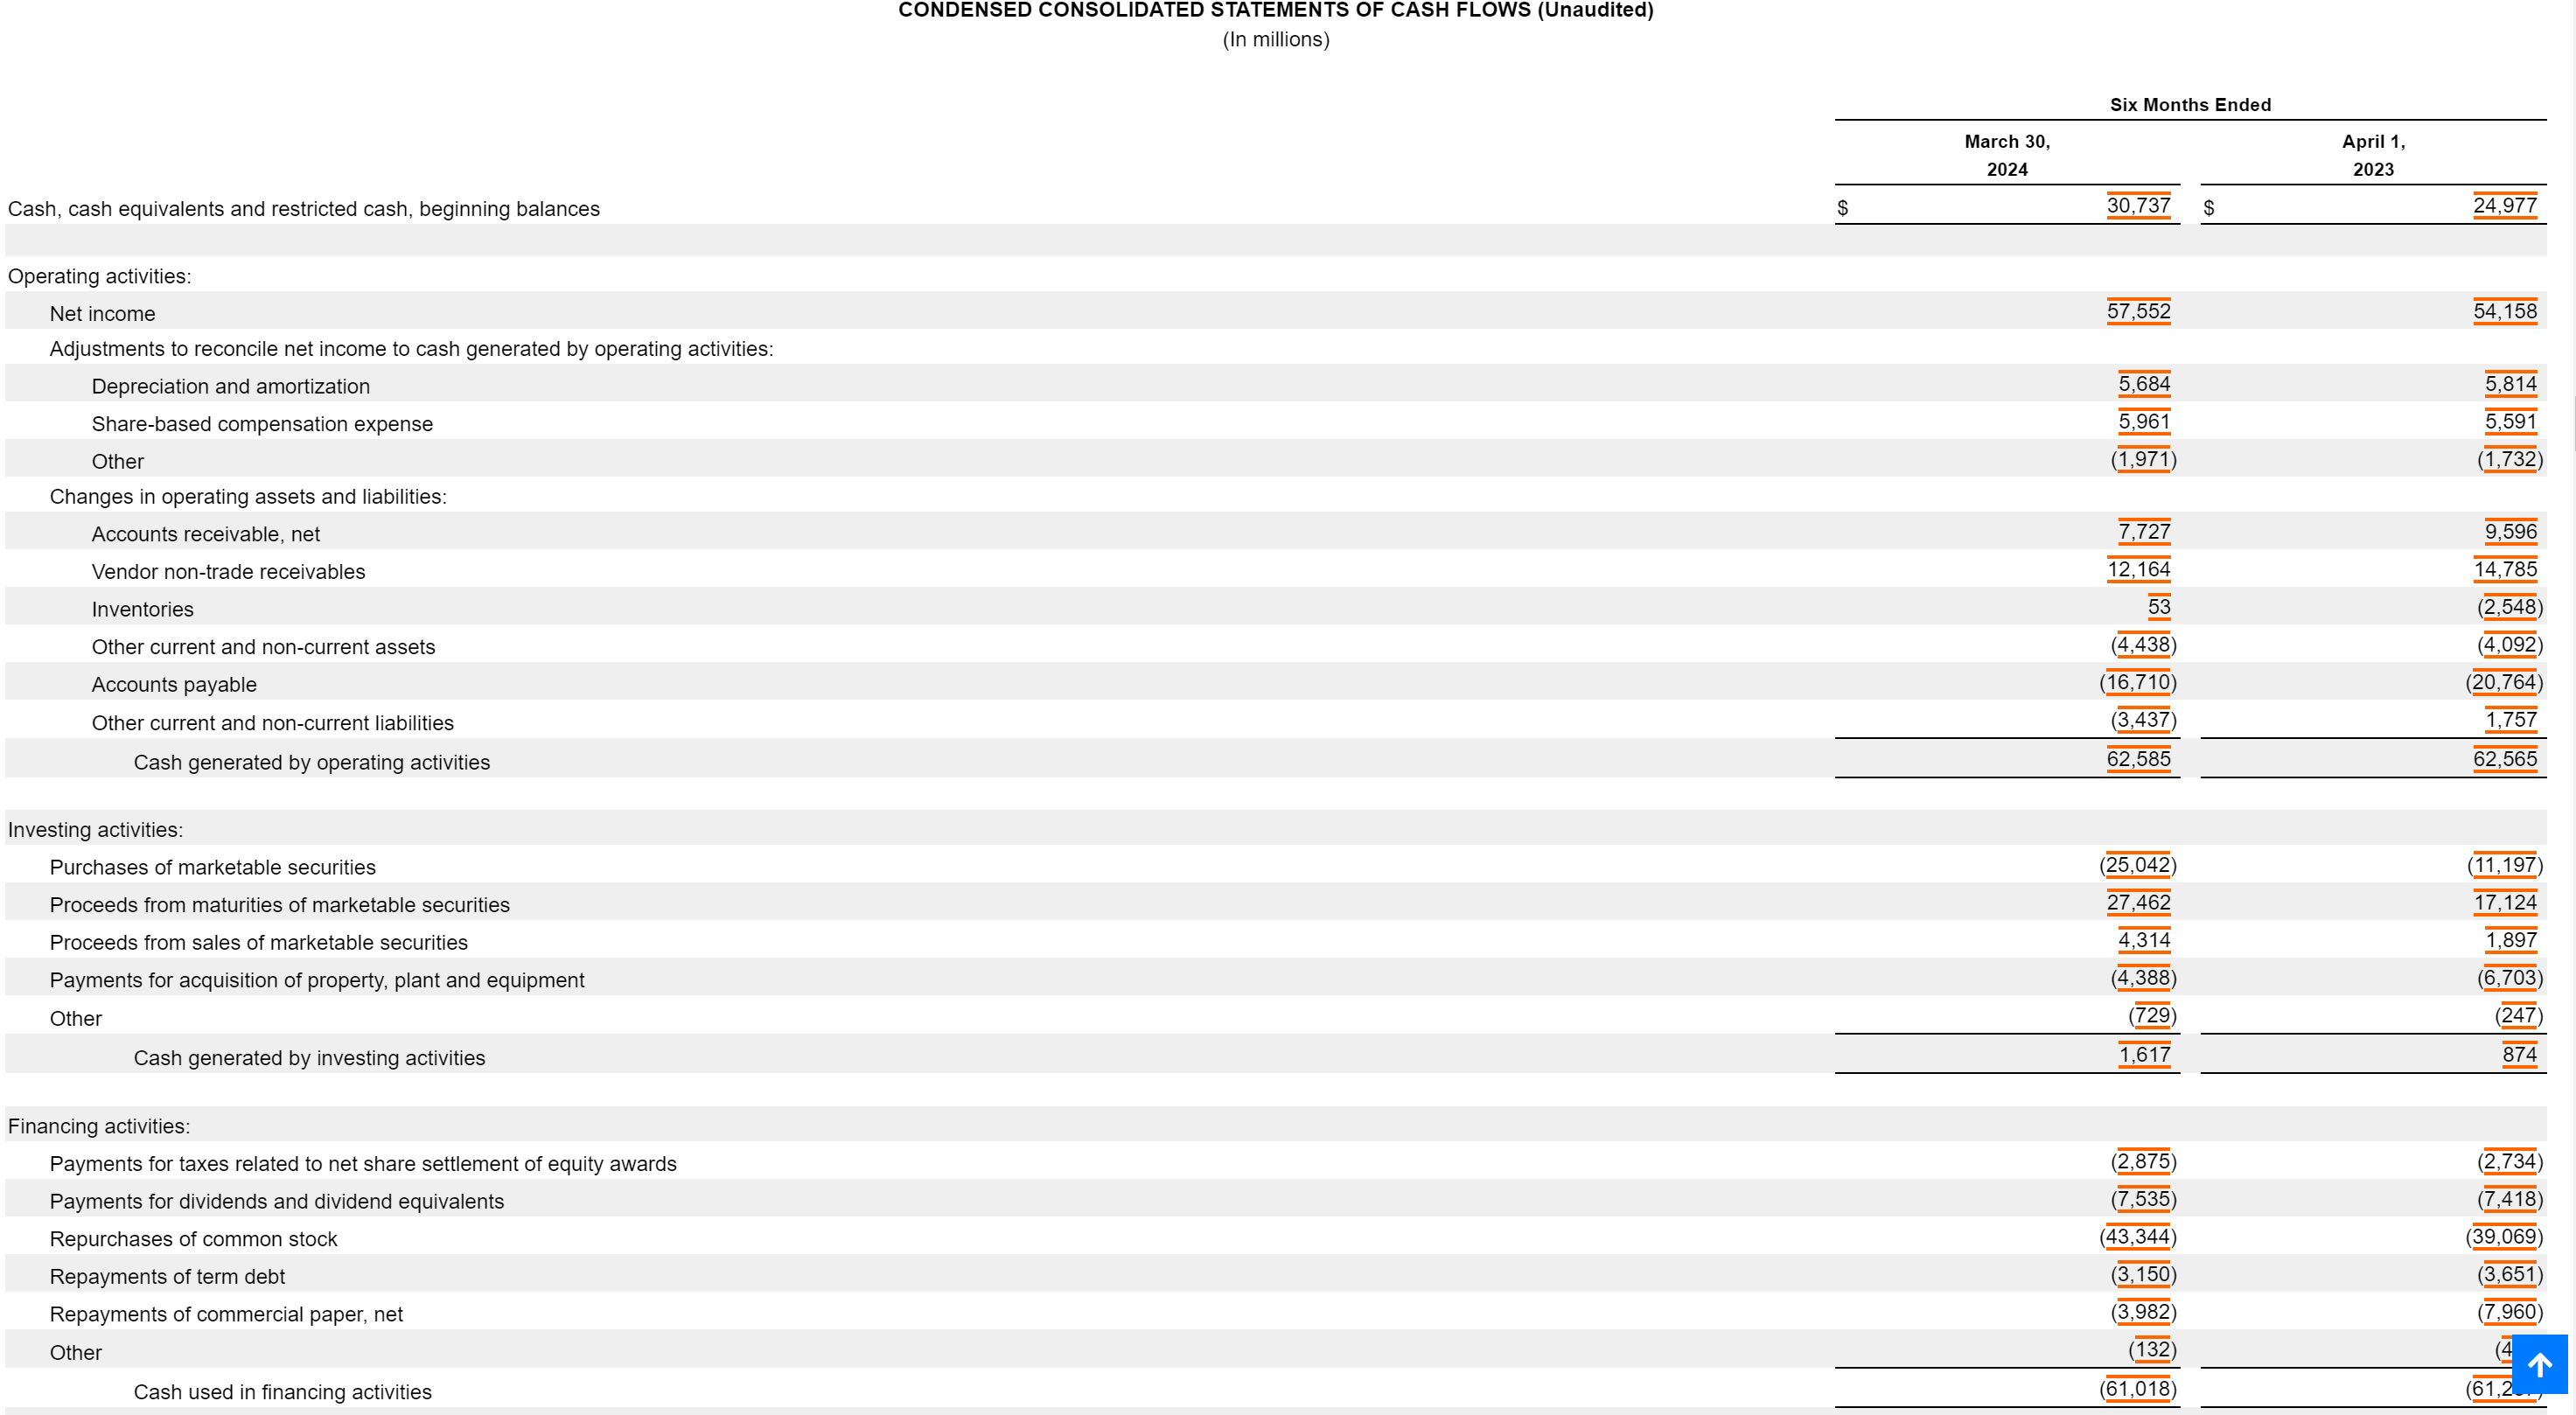

In [ ]:
cash_flow_img

In [ ]:
output = doc_qa_model(
    cash_flow_path,
    "What were Inventories in the three months ending on April 1, 2023?"
)

answer = output[0]["answer"]
print(answer)

(2,548)


### Documentation on how to fine-tune LayoutLM

The model we used here was a fine-tuned version of LayoutLM a document question answering model.

You can find instructions here on how to fine-tune your own LayoutLM model to your dataset:

https://huggingface.co/docs/transformers/main/en/tasks/document_question_answering